# Root finding
Quite often in physics (and mathematics) we come across problems which require us to find the root or zero of a function 
$$ f(x)=0$$
or 
$$ g(x)=b$$
$$g(x)-b=0$$
$$f(x)=0$$
Typically, numerical solutions for such equation start with making a rough guess of the answer, and use it to make better guesses. The guesses become a better and better approximation to the solution. We should keep in mind that these methods only give us an approximate solution, except in certain special cases. The level of approximation depends on the algorithm and how much computational time we are willing to devote. The best methods are ones that ensure convergence within the fewest iterations. Also be careful with discontinuous functions, in which case these methods might not give correct answer.

## Bisection method

Given a function $f(x)$, suppose we know two points $a$ and $b$ such that $f(x)$ changes sign in the interval $[a,b]$, that is, $f(a).f(b)<0$. We take a guess $x_0$ midway between $a$ and $b$, $x_0=(a+b)/2$. Now, we change the value of $a$ or $b$ based on the value of $x_0$, making either of $a$ or $b$ equal to $x_0$ such that the property $f(a).f(b)<0$ remains true. We repeat this process till we get $f(x_0)$ close enough to 0. How close? that depends on us, how accurate answer do we need. We can stop the iteration whenever $f(x)<\epsilon$ where $\epsilon$ is entered by the user. 

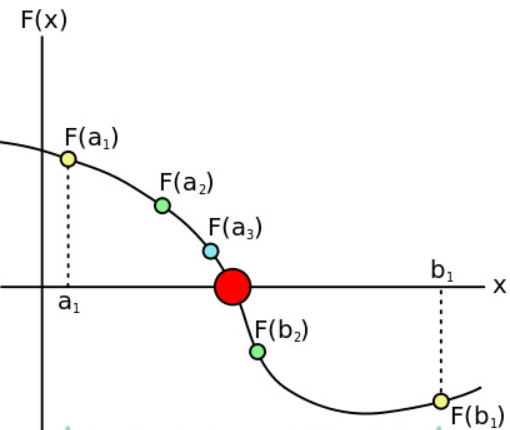

We iterate by halving the interval and selecting the sub-interval that has a sign change. As long as our function, f(x) changes sign within our initial interval, $[a,b]$, the bisection method will converge. As we reduce the interval to half in each iteration, the convergence is linear. 

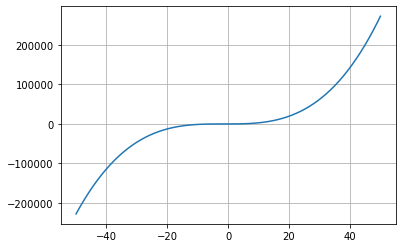

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

#defining the function
def f(x):
    return 2*x**3+9*x**2+4*x+1


#plotting the function so we can make approximate guess from the graph
x=np.linspace(-50,50,1000)
plt.plot(x,f(x))
plt.grid()
plt.show()

In [2]:
#from the graph we can see that f(x) has opposite signs at -20 and 20
a=-20
b=20
#initial guesses

error=0.01
#error tolerance

x=(a+b)/2


#bisection method algorithm
while(abs(f(x))>error):
    if(f(x)*f(a)<0):
        b=x
    else:
        a=x
    x=(a+b)/2.0
    
    
print(x,"  ",f(x))

-4.0350341796875    0.0005460610882437322


In [3]:
#lets try to find out number of iterations it took to get to the solution
a=-20
b=20
error=0.01
n1=0 #counter for calculating number of iterations
x=(a+b)/2


while(abs(f(x))>error):
    if(f(x)*f(a)<0):
        b=x
    else:
        a=x
    x=(a+b)/2.0
    n1=n1+1
    
    
print(n1)

15


In [4]:
#lets decrease our error tolerance
a=-20
b=20
error=10**-14
n2=0
x=(a+b)/2


while(abs(f(x))>error):
    if(f(x)*f(a)<0):
        b=x
    else:
        a=x
    x=(a+b)/2.0
    n2=n2+1
    
    
print(n2)
print(x,f(x))

51
-4.035052971359088 -7.105427357601002e-15


## Newton-Raphson method
Newton-Raphson method is a more efficient and quicker way to find roots. We can expand the function $f(x)$ around $x_0$ using Taylor series. $$f(x_0)=f(x)-f'(x)(x_0-x)+...$$
Since, we want $f(x_0)=0$ , $x_0=x-f(x)/f'(x)$. But since we ignored higher order terms, $x_0$ is only an approximate solution. We need to iterate these steps, that is, the following relation, $$x_{n+1}=x_n-f(x_n)/f'(x_n)$$ till we get a close enough root.

For this method to work our initial guess must be "close" enough, otherwise the sequence might not converge. As there is no gaurantee that the sequence converges, its generally a good idea to limit the number of iterations otherwise the program might run forever.

There is also a geometrical intuition for this method.
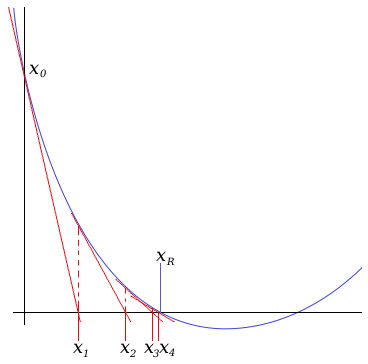

This method converges when $|f(x).f''(x)|<|f'(x)|^2$. If you're interested you can find the proof here https://math.stackexchange.com/questions/3136446/condition-for-convergence-of-newton-raphson-method, although for our purpose we don't require the proof.

In [5]:
#defining the derivative of the function
def f1(x):
    return 6*x**2+18*x+4

n1=0
error=0.01
x=20

while((abs(f(x))>error) and (n1<100)):
    x1=x-f(x)/f1(x)
    x=x1
    n1=n1+1

print(n1)
print(x,f(x))

15
-4.035053298143512 -9.496017593590977e-06


In [6]:
n2=0
error=10**-14
x=20

while((abs(f(x))>error) and (n1<100)):
    x1=x-f(x)/f1(x)
    x=x1
    n2=n2+1

print(n2)
print(x,f(x))

17
-4.035052971359088 -7.105427357601002e-15


Comparing with bisection method, we can clearly see that Newton-Raphson method is faster as we can see that it takes lesser number of steps to get error tolerance of $10^{-14}$.

Lets try another function

17
1.8155922647734832 1.0996821142583713e-07


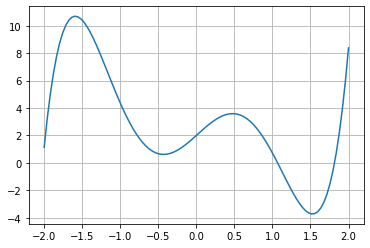

In [7]:
#defining the function
def f(x):
    return 2*x**5-9*x**3+4*x+1+np.exp(x)

#defining the derivative
def f1(x):
    return 10*x**4-27*x*x+4+np.exp(x)

#plotting the function
x=np.linspace(-2,2,100)
plt.grid()
plt.plot(x,f(x))

#setting the initial parameters
n1=0
error=0.0001
x=0

#Newton-Raphson method algorithm
while((abs(f(x))>error) and (n1<100)):
    x1=x-f(x)/f1(x)
    x=x1
    n1=n1+1

    
print(n1)
print(x,f(x))

In [8]:
#changing the value of initial guess and the error tolerance 
n1=0
error=10**-14
x=-15

while((abs(f(x))>error) and (n1<100)):
    x1=x-f(x)/f1(x)
    x=x1
    n1=n1+1
    
print(n1)
print(x,f(x))

15
-2.0194981102277465 8.049116928532385e-16


# Secant method
The secant method is quite similar to Newton-Raphson method without the need for derivative. We start with two guesses, $a$ and $b$, and approximate the slope by making a line passing through $(a,f(a))$ and $(b,f(b))$. We find the value of $x$ at which this line intersects the $x$-axis. Next, we repeat the process with this new point $x$ and the initial guess which is closest to the new point. We keep repeating the process till the change from one iteration to next iteration is small enough. To summarise we use the following relation after starting from two initial guesses.
$$x_{n+1}=x_n-f(x_n)(x_n-x_{n-1})/(f(x_n)-f(x_{n-1}))$$
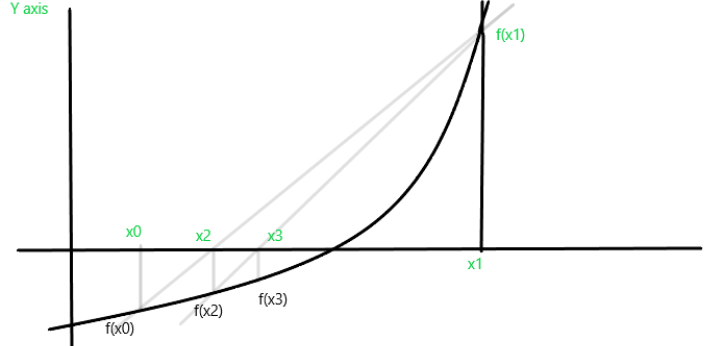

Like Newton-Raphson method, the secant method might also not give the answer if the initial guess is not good enough, but its faster than the bisection method. It has an advantage over Newton-Raphson method as it does not need derivatives.

In [9]:
def f(x):
    return 2*x**3+9*x**2+4*x+1

#initial parameters
a=-5
b=-10
error=0.01
n1=0

#secant method algorithm
x=b+f(b)*(b-a)/(f(b)-f(a))
while(abs(f(x))>error and n1<100):
    a=b
    b=x
    x=b-f(b)*(b-a)/(f(b)-f(a))
    n1=n1+1
   

print(n1)
print(x,f(x))

9
-4.035133225766801 -0.002332207703553024


In [10]:
def f(x):
    return 2*x**5-9*x**3+4*x+1+np.exp(x)

a=-10
b=10
error=10**-14
n1=0

x=b+f(b)*(b-a)/(f(b)-f(a))
while(abs(f(x))>error and n1<100):
    a=b
    b=x
    x=b-f(b)*(b-a)/(f(b)-f(a))
    n1=n1+1
    
    
print(n1)
print(x,f(x))

22
1.815592261083706 3.552713678800501e-15


## Assignment

1) Find the exact solution of Q1 in `matplotlib.ipynb` file, using the root solving methods discussed here, and the initial guess which you got in that question.


2) The voltage difference $V_0$ across a diode is related to current $I$ passing through it by $I=I_s.(e^\frac{V_0}{nV_T}-1)$. Find the value of $V_0$ for the following circuit. Take $I_s=2*10^{-15}A, V_T=26mV, n=1, V_s=2V, R=1k \Omega$
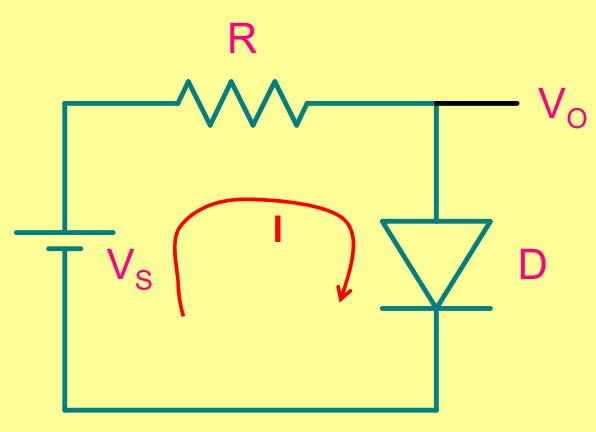